Python for Bioinformatics, Practical Classes 1

<h4> Exercise1: Let's define a nucleotide sequence ATTTGGCCTA and replace within it every Thymine (T) with Uracil (U).

Example: Create a function ComDNA that takes a nucleotide sequence and returns the complementary one.


In [ ]:
# exercise 1

def ComDNA(seq): 
    """
    This function takes a nucleotide 
    sequence and returns the complementary one.
    """  
    complementary_code = {"A":"T", "T":"A", "G":"C", "C":"G"}
    com_seq = '' #creating an empty string that will contain a complementary sequence   
    
    for elem in seq:
        com_seq += complementary_code[elem] #add subsequent complement nucleotide to com_seq variable. 
    return com_seq

In [ ]:
sequence = "ATGGGCC"
print(ComDNA(sequence))

TACCCGG


<h4> Exercise2: Create a function RevComDNA that takes a nucleotide sequence and returns the reverse complementary one.
For example RevComDNA("ATTGGCCAAA") should return 'TTTGGCCAAT'.

In [1]:
# exercise 2

def RevComDNA(seq): 
    """
    This function takes a nucleotide 
    sequence and returns the complementary one.
    """  
    # reverse the sequence
    rev_seq = seq[::-1]
    complementary_code = {"A":"T", "T":"A", "G":"C", "C":"G"}
    rev_com_seq = '' #creating an empty string that will contain a complementary sequence  

    for elem in rev_seq:
        rev_com_seq += complementary_code[elem] #add subsequent complement nucleotide to com_seq variable. 
    return rev_com_seq

In [2]:
RevComDNA("ATGGGCC")

'GGCCCAT'

Example: Create a function CountNucSeq that takes a nucleotide sequence and returns the dictionary containing nucleotide counts.

In [24]:
def CountNucSeq(seq):
    """
    This function takes a nucleotide 
    sequence and returns the count dictionary
    for each of them.
    """
    nucleotides = ["A", "T", "G", "C"]
    frequencies = [seq.count("A"),seq.count("T"),seq.count("G"),seq.count("C")]
    d = dict(zip(nucleotides, frequencies))
    return d

In [25]:
sequence = "ATGGGGATTG"
print(CountNucSeq(sequence))

{'A': 2, 'T': 3, 'G': 5, 'C': 0}


<h4> Exercise3: Write a function FrecNucSeq that for a given nucleotide sequence returns frequencies of occuring for each nucleotide.


In [26]:
# exercise 3

def FreqNucSeq(seq):
    nucleotides = ["A", "T", "G", "C"]

    total = len(seq)

    # calculate frequencies
    freqA = seq.count("A")/total*100
    freqT = seq.count("T")/total*100
    freqG = seq.count("G")/total*100
    freqC = seq.count("C")/total*100

    frequencies = [freqA, freqT, freqG, freqC]

    # convert into dictonary
    d = dict(zip(nucleotides, frequencies))

    return d

In [27]:
sequence = "ATGGGGATTG"
print(FreqNucSeq(sequence))

{'A': 20.0, 'T': 30.0, 'G': 50.0, 'C': 0.0}


Example: Let's say we have two nucleotide sequences (with the same length). We want to compare them - if they have the same nucleotide at the same position, then put 1 into the list. In other case put -2. For example for ATGC and AGGC we should obtain [1,-2,1,1].

In [ ]:
def CompareSequences(seq1, seq2):    
    """
    This function compares two nucleotide 
    sequences at the subsequent positions, 
    put 1 into the list (if the same); 
    in other case put -2
    """   
    N1 = len(seq1)
    N2 = len(seq2)
    
    if N1 == N2:    #case when sequenses have the same length
        y = []      #creating an empty list
        for i in range(N1):
            if seq1[i]==seq2[i]:  #if sequences have the same nucleotide at i-position
                y.append(1)
            else:
                y.append(-2)
        return y
    
    else:    #Case when sequences have differnt lengths
        return "Sequences have different length."

In [ ]:
print(CompareSequences("ATGC","AGGC"))

[1, -2, 1, 1]


In [ ]:
print(CompareSequences("ATGC","AGGCT"))

Sequences have different length.


We can use the result from above function to the other function. Let's define a function  ScoreSeq  that returns the sum of the list from CompareSequences (of course, the higher score the sequences are more similar).

In [ ]:
def ScoreSeq(seq1, seq2):   
    """
    This function returns the sum 
    of the list from CompareSequences
    """ 
    N1 = len(seq1)
    N2 = len(seq2)
    if N1 == N2:
        S = sum(CompareSequences(seq1, seq2))  #here we use the result from the previous function
        return S
    else:
        return "Sequences have different length"

In [ ]:
print(ScoreSeq("ATGC", "AGGC"))

1


An analogous function for comparing two sequences:

In [ ]:
def CalcSeqIdentity(seqA, seqB):
    numPlaces = min(len(seqA), len(seqB))
    score = 0.0
    for i in range(numPlaces):
        if seqA[i] == seqB[i]:
            score += 1.0
    return 100.0 * score/numPlaces

In [ ]:
seq1 = 'ALIGNMENTS'
seq2 = 'ALIGDVENTS'
seq3 = 'ALIGDPVENTS'
seq4 = 'ALIGN-MENTS'  #seq1 with a gap inserted

print(CalcSeqIdentity(seq1, seq2)) 
print(CalcSeqIdentity(seq1, seq3)) 
print(CalcSeqIdentity(seq4, seq3)) #'-' insertion results in higher similarity than seq1 vs seq3

80.0
40.0
72.72727272727273


<h3> Dot matrix


In [37]:
import numpy as np
import matplotlib.pyplot as plt


def dotMatrix(sequence1, sequence2):
    
    S1 = len(sequence1)
    S2 = len(sequence2)

    A = np.zeros((S1, S2))

    for i in range(S1):
        for j in range(S2):
            if sequence1[i] == sequence2[j]:  #if sequences have the same residue at i and j poistions respectively
                A[i,j] = 1

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(A)
    xaxis = np.arange(S2)
    yaxis = np.arange(S1)
    ax.set_xticks(xaxis)
    ax.set_yticks(yaxis)
    ax.set_xticklabels(sequence2)
    ax.set_yticklabels(sequence1)

    plt.show()

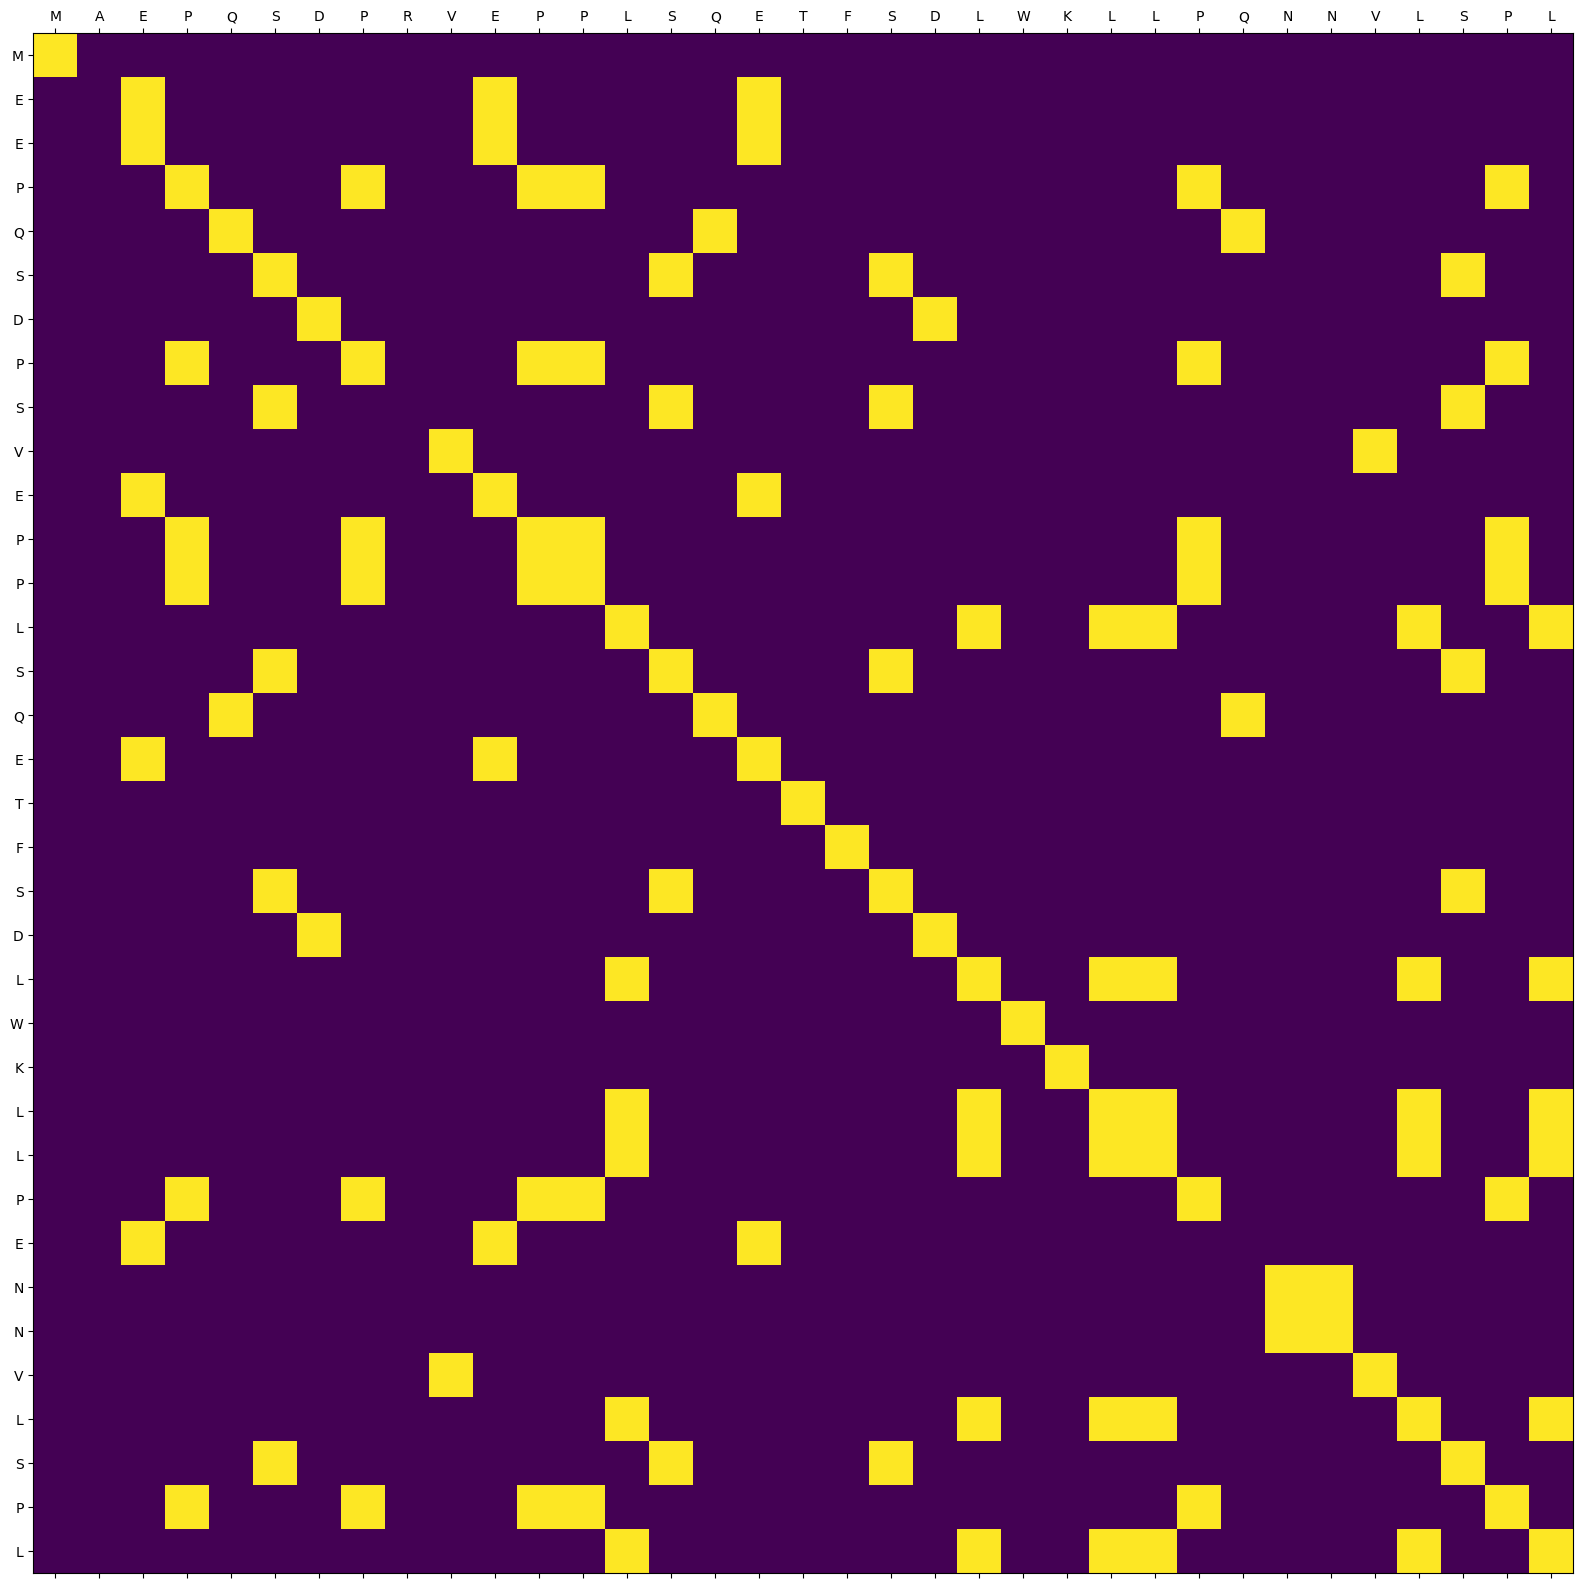

In [38]:
dotMatrix("MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPL", "MAEPQSDPRVEPPLSQETFSDLWKLLPQNNVLSPL")



<h4> Exercise4: Plot a dot matrix for following sequences. Make a comment on it.

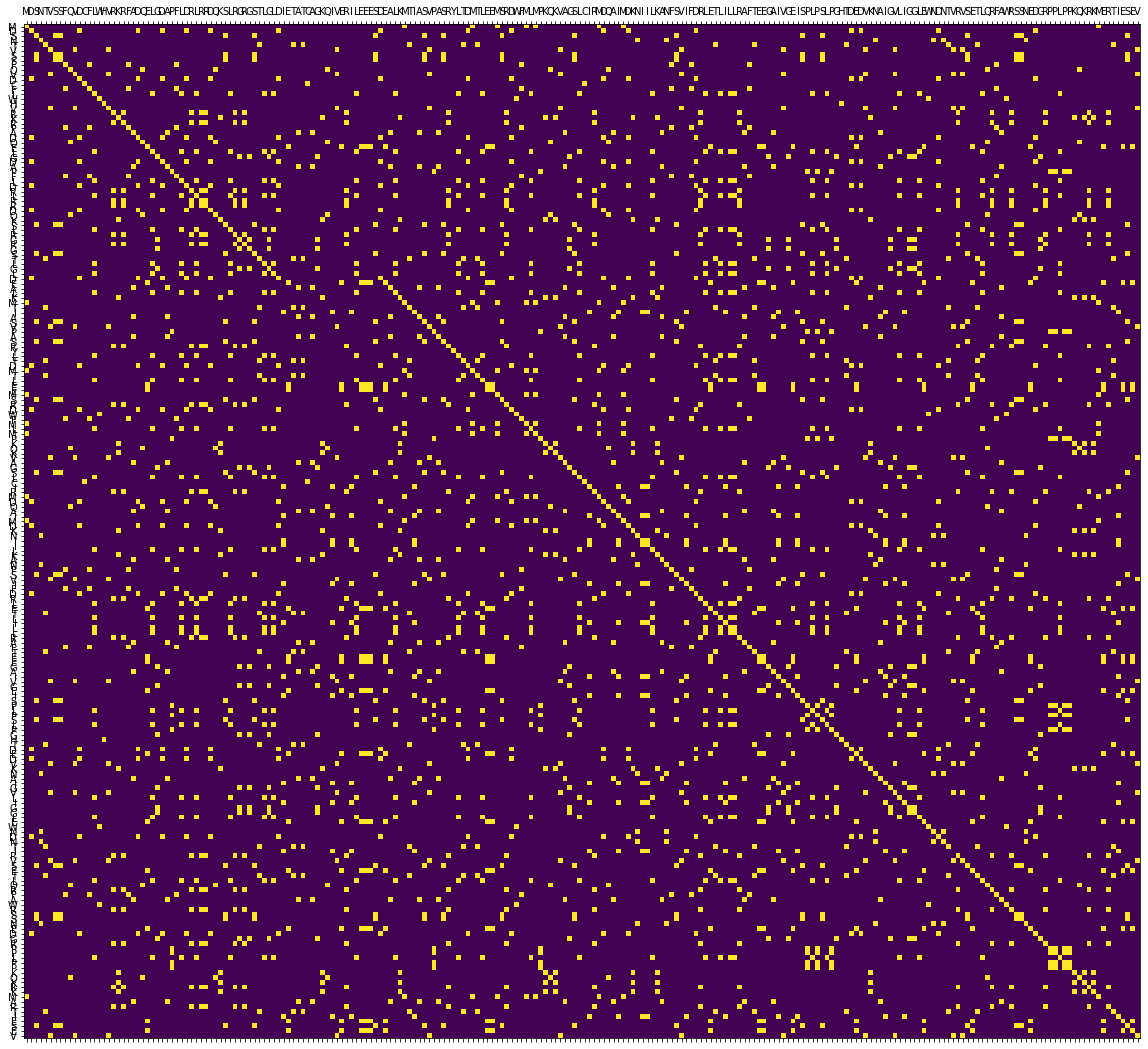

In [ ]:
# exercise 4

s1 = "MDSNTVSSFQVDCFLWHVRKRFADQELGDAPFLDRLRRDQKSLRGRGSTLGLDEALKMTIASVPASRYLTDMTLEEMSRDWFMLMPKQKVAGSLCIRMDQAIMDKNIILKANFSVIFDRLETLILLRAFTEEGAIVGEISPLPSLPGHTDEDVKNAIGVLIGGLEWNDNTIRVSETLQRFAWRSSNEDGRPPLPPKQKRKMARTIESEV"
s2 = "MDSNTVSSFQVDCFLWHVRKRFADQELGDAPFLDRLRRDQKSLRGRGSTLGLDIETATCAGKQIVERILEEESDEALKMTIASVPASRYLTDMTLEEMSRDWFMLMPKQKVAGSLCIRMDQAIMDKNIILKANFSVIFDRLETLILLRAFTEEGAIVGEISPLPSLPGHTDEDVKNAIGVLIGGLEWNDNTVRVSETLQRFAWRSSNEDGRPPLPPKQKRKMERTIESEV"

dotMatrix(s1, s2)

# the sequences are quite similar, it seems s2 is just like s1 but with a addition of a fragment "IETATCAGKQIVERILEEESD" in position 54


<h3> Similarity and Mismatches

In [ ]:
DNA_1 = {'G': { 'G':1, 'C':0, 'A':0, 'T':0 },
'C': { 'G':0, 'C':1, 'A':0, 'T':0 },
'A': { 'G':0, 'C':0, 'A':1, 'T':0 },
'T': { 'G':0, 'C':0, 'A':0, 'T':1 }}

In [46]:
DNA_2 = {'G': { 'G': 1, 'C':-3, 'A':-3, 'T':-3, 'N':0 },
'C': { 'G':-3, 'C': 1, 'A':-3, 'T':-3, 'N':0 },
'A': { 'G':-3, 'C':-3, 'A': 1, 'T':-3, 'N':0 },
'T': { 'G':-3, 'C':-3, 'A':-3, 'T': 1, 'N':0 },
'N': { 'G': 0, 'C': 0, 'A': 0, 'T': 0, 'N':0 }}

In [ ]:
REV_COMP = {'G': { 'G':-1, 'C': 1, 'A':-1, 'T':-1 },
'C': { 'G': 1, 'C':-1, 'A':-1, 'T':-1 },
'A': { 'G':-1, 'C':-1, 'A':-1, 'T': 1 },
'T': { 'G':-1, 'C':-1, 'A': 1, 'T':-1 }}

In [39]:
import numpy as np

B62 = np.array([[4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2,0],
[-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
[-2, 0,  6,  1, -3,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3], 
[-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3], 
[0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1], 
[-1,  1,  0,  0, -3,  5,  2, -2, 0, -3, -2, 1,  0, -3, -1,  0, -1, -2, -1, -2], 
[-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2], 
[0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2, 0, -2, -2, -3, -3], 
[-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
[-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3], 
[-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1], 
[-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2],
[-1, -1, -2, -3, -1,  0, -2, -3, -2, 1, 2, -1,  5,  0, -2, -1, -1, -1, -1,  1], 
[-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1], 
[-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2], 
[1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1, 4, 1, -3, -2, -2], 
[0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1, 1, 5, -2, -2, 0],
[-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11, 2, -3], 
[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -2, -1, 3, -3, -2, -2,  2, 7, -1],
[0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -2, 1, -1, -2, -2, 0, -3, -1, 4]]) 

In [ ]:
[np.min(B62), np.max(B62)]

[-4, 11]

In [40]:
aa = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"] #a list of corresponding amino acids

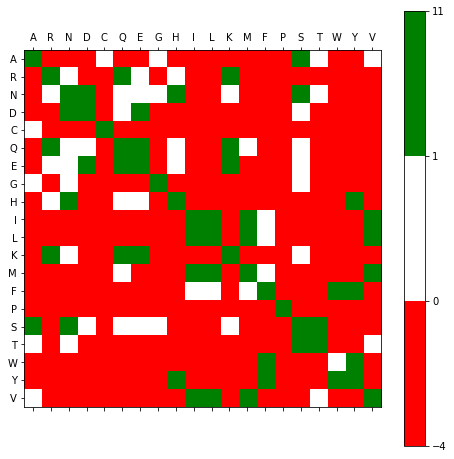

In [ ]:
#plotting B62 matrix

import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

levels = [-4, 0, 1, 11]
colors = ['red', 'white', 'green']
cmap, norm = from_levels_and_colors(levels, colors)
cax = ax.matshow(B62,cmap=cmap, norm = norm) #here
fig.colorbar(cax)

xaxis = np.arange(len(aa))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(aa)
ax.set_yticklabels(aa)

plt.show()

In [41]:
BLOSUM62 = {aa[i]:{aa[j]: B62[i][j] for j in range(20)} for i in range(20)} #the same as B62, but this time stored as a dictionary
print(BLOSUM62)

{'A': {'A': 4, 'R': -1, 'N': -2, 'D': -2, 'C': 0, 'Q': -1, 'E': -1, 'G': 0, 'H': -2, 'I': -1, 'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 0, 'W': -3, 'Y': -2, 'V': 0}, 'R': {'A': -1, 'R': 5, 'N': 0, 'D': -2, 'C': -3, 'Q': 1, 'E': 0, 'G': -2, 'H': 0, 'I': -3, 'L': -2, 'K': 2, 'M': -1, 'F': -3, 'P': -2, 'S': -1, 'T': -1, 'W': -3, 'Y': -2, 'V': -3}, 'N': {'A': -2, 'R': 0, 'N': 6, 'D': 1, 'C': -3, 'Q': 0, 'E': 0, 'G': 0, 'H': 1, 'I': -3, 'L': -3, 'K': 0, 'M': -2, 'F': -3, 'P': -2, 'S': 1, 'T': 0, 'W': -4, 'Y': -2, 'V': -3}, 'D': {'A': -2, 'R': -2, 'N': 1, 'D': 6, 'C': -3, 'Q': 0, 'E': 2, 'G': -1, 'H': -1, 'I': -3, 'L': -4, 'K': -1, 'M': -3, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -4, 'Y': -3, 'V': -3}, 'C': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': 9, 'Q': -3, 'E': -4, 'G': -3, 'H': -3, 'I': -1, 'L': -1, 'K': -3, 'M': -1, 'F': -2, 'P': -3, 'S': -1, 'T': -1, 'W': -2, 'Y': -2, 'V': -1}, 'Q': {'A': -1, 'R': 1, 'N': 0, 'D': 0, 'C': -3, 'Q': 5, 'E': 2, 'G': -2, 'H': 0, 'I': -3, 'L'

<h4> Exercise5: Write a function that generates a dot matrix but this time put an appropriate BLOSUM62 value when comparing amino acid on  i  and  j  postions. Applly it to sequences from Ex. 4. 

In [44]:
# exercise 5

def dotMatrix_B62(sequence1, sequence2, dictionary=BLOSUM62):

    S1 = len(sequence1)
    S2 = len(sequence2)

    A = np.zeros((S1, S2))

    for i in range(S1):
        for j in range(S2):
            # take one aa from each sequence
            aa1 = sequence1[i]
            aa2 = sequence2[j]  
            # check the score from matrix          
            A[i,j] =  dictionary[aa1][aa2]

    fig = plt.figure(figsize=(S1/8, S2/8))
    ax = fig.add_subplot()
    cax = ax.matshow(A)
    xaxis = np.arange(S2)
    yaxis = np.arange(S1)
    ax.set_xticks(xaxis)
    ax.set_yticks(yaxis)
    ax.set_xticklabels(sequence2)
    ax.set_yticklabels(sequence1)

    plt.show()

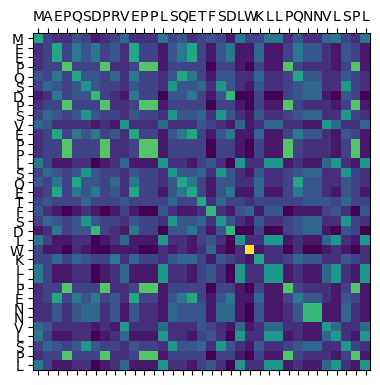

In [45]:
dotMatrix_B62("MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPL", "MAEPQSDPRVEPPLSQETFSDLWKLLPQNNVLSPL", BLOSUM62)

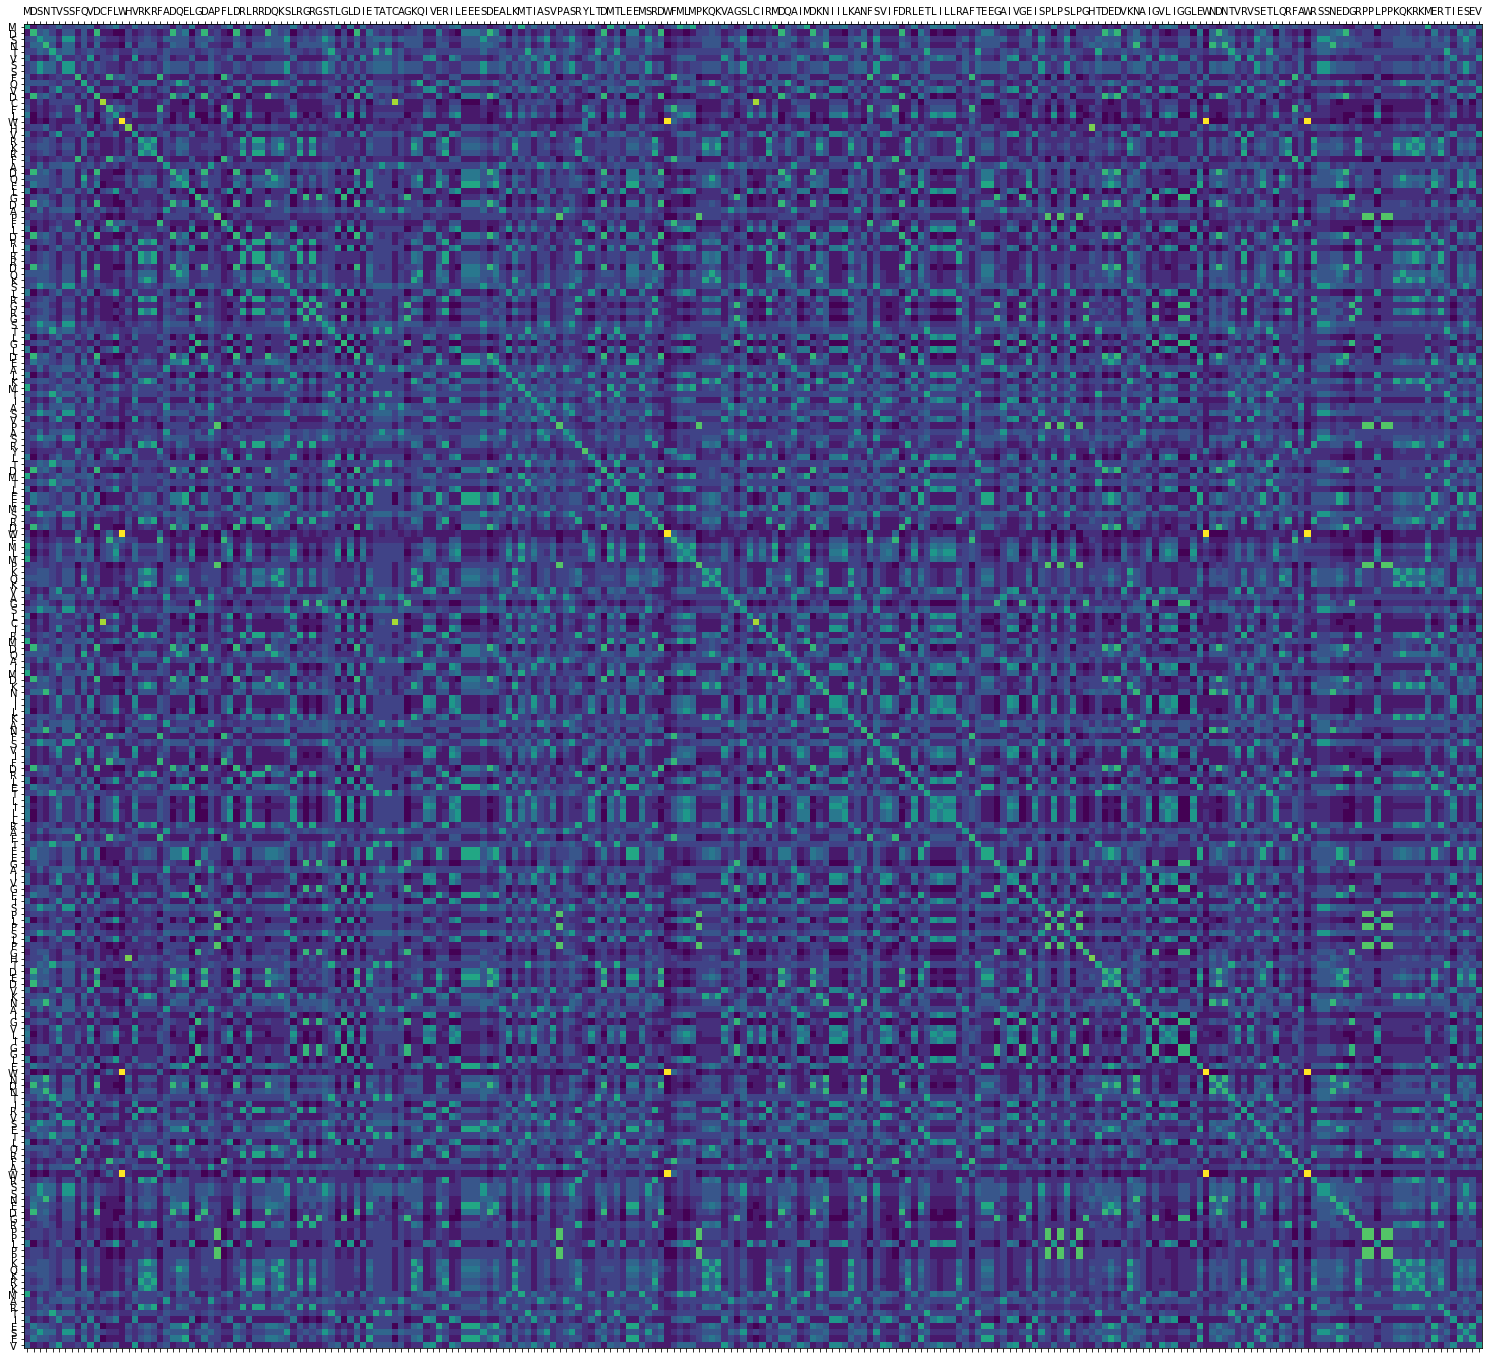

In [ ]:
s1 = "MDSNTVSSFQVDCFLWHVRKRFADQELGDAPFLDRLRRDQKSLRGRGSTLGLDEALKMTIASVPASRYLTDMTLEEMSRDWFMLMPKQKVAGSLCIRMDQAIMDKNIILKANFSVIFDRLETLILLRAFTEEGAIVGEISPLPSLPGHTDEDVKNAIGVLIGGLEWNDNTIRVSETLQRFAWRSSNEDGRPPLPPKQKRKMARTIESEV"
s2 = "MDSNTVSSFQVDCFLWHVRKRFADQELGDAPFLDRLRRDQKSLRGRGSTLGLDIETATCAGKQIVERILEEESDEALKMTIASVPASRYLTDMTLEEMSRDWFMLMPKQKVAGSLCIRMDQAIMDKNIILKANFSVIFDRLETLILLRAFTEEGAIVGEISPLPSLPGHTDEDVKNAIGVLIGGLEWNDNTVRVSETLQRFAWRSSNEDGRPPLPPKQKRKMERTIESEV"

dotMatrix_B62(s1, s2)

<h3> Sequences comparison using similiarity matrices

In [47]:
def CalcSeqSimilarity(seqA, seqB, simMatrix):
    N = min(len(seqA), len(seqB))
    Score = 0.0
    for i in range(N):
        rA = seqA[i]   
        rB = seqB[i]  
        Score += simMatrix[rA][rB]
    return Score

In [48]:
print(CalcSeqSimilarity('AGCTT', 'AGGTT', DNA_2))
print(CalcSeqSimilarity('ALI', 'AYI', BLOSUM62))

1.0
7.0


<h3> Alignment

Construct  SM  matrix according to the following formula:

- put in the first row and column 0 values.

- $SM[i,j]=\max(S[i−1,j−1]+Score,SM[i−1,j]−Penalty,SM[i,j−1]−Penalty)$.


The last cell contain Total Score.



Additionally, to include a penalty for insertion and extension RM matrix is used:

$RM$ matrix contains information about kind of events (matches/mismatches/indel).

- 0  (pairing of two residues)
- 1  (gap in seqB, residue in seqA)
- 2  (gap in seqA, residude in seqB)

In [ ]:
def SequenceAlign(seqA, seqB, similarityMatrix=DNA_2, insert=5, extend=3):
    
    import numpy as np
    
    numI = len(seqA) + 1
    numJ = len(seqB) + 1
    
    SMatrix = np.zeros((numI, numJ))
    RMatrix = np.zeros((numI, numJ))
    
    for i in range(1, numI):
        RMatrix[i, 0] = 1
        
    for j in range(1, numJ):
        RMatrix[0, j] = 2
    
    for i in range(1, numI):
        for j in range(1, numJ):
            
            penalty1 = insert
            penalty2 = insert
            
            if RMatrix[i-1, j] == 1:
                penalty1 = extend
                
            elif RMatrix[i, j-1] == 2:
                penalty2 = extend
                
            similarity = similarityMatrix[seqA[i-1]][seqB[j-1]]
            
            paths = [SMatrix[i-1, j-1] + similarity,
                     SMatrix[i-1, j] - penalty1,
                     SMatrix[i, j-1] - penalty2]
        
            best = max(paths)         #maximum value of path list
            route = paths.index(best) #index where maximum value
        
            SMatrix[i, j] = best  
            RMatrix[i, j] = route
                    
        alignA = []
        alignB = []
        
        i = numI-1
        j = numJ-1
            
        score = SMatrix[i, j]
        
        while i > 0 or j > 0:
            route = RMatrix[i, j]
            
            if route == 0: 
                alignA.append( seqA[i-1] )
                alignB.append( seqB[j-1] )
                i -= 1
                j -= 1
                
            elif route == 1:
                alignA.append( seqA[i-1] )
                alignB.append( '-' )
                i -= 1
                
            elif route == 2: 
                alignA.append( '-' )
                alignB.append( seqB[j-1] )
                j -= 1
                
    alignA.reverse()
    alignB.reverse()
    
    alignA = ''.join(alignA)
    alignB = ''.join(alignB)
    
    return score, alignA, alignB 

In [ ]:
seqA = 'WFSEPEIST'
seqB = 'FSRPAVVIST'

score, alignA, alignB = SequenceAlign(seqA, seqB, BLOSUM62)
print(score)
print(alignA) 
print(alignB) 

21.0
WFSEPE--IST
-FSRPAVVIST


<h4> Exercise6: Compare an alignment with (insert=1, extend=1) and (insert=8, extend=2) for the following sequences. Make a comment on it.


In [ ]:
# exercise 6

seq_a = "FSRPAVVAIST"
seq_b = "FSRPAAVVIST"

print("\t insert=1, extend=1")
score, align_a, align_b = SequenceAlign(seq_a, seq_b, BLOSUM62, 1, 1)
print(score)
print(align_a) 
print(align_b) 

print("\n\t insert=8, extend=2")
score, align_a, align_b = SequenceAlign(seq_a, seq_b, BLOSUM62, 8, 2)
print(score)
print(align_a) 
print(align_b) 

# adding more "penalty" to gaps can create alignments with lower scores.
# in this case the difference between the two scores is only 2.0, 
# but it could be higher for longer sequences


	 insert=1, extend=1
45.0
FSRP-AVVAIST
FSRPAAVV-IST

	 insert=8, extend=2
43.0
FSRPAVVAIST
FSRPAAVVIST


<h4> Exercise7: Plot a dot matrix and make an alignment for the following sequences (Metallothionein). Whether both sequences are similar?

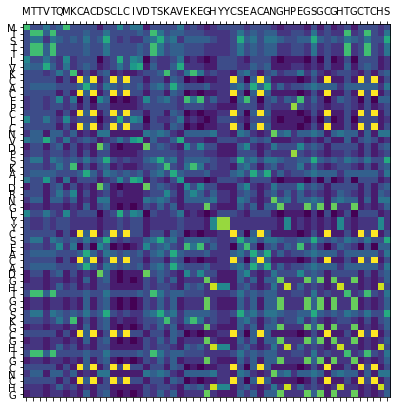



score: 226
MTSTTLVKCACEPCLCNVDPSKAIDRNGLYYCSEACADGHTGGSKGCGHTGCNCHG
MTTVTQMKCACDSCLCIVDTSKAVEKEGHYYCSEACANGHPEGS-GCGHTGCTCHS


In [ ]:
# exercise 7

seq_a = 'MTSTTLVKCACEPCLCNVDPSKAIDRNGLYYCSEACADGHTGGSKGCGHTGCNCHG'
seq_b = 'MTTVTQMKCACDSCLCIVDTSKAVEKEGHYYCSEACANGHPEGSGCGHTGCTCHS'

dotMatrix_B62(seq_a, seq_b)

print("\n")
score, align_a, align_b = SequenceAlign(seq_a, seq_b, BLOSUM62)
print("score: %d" % score)
print(align_a) 
print(align_b) 

# the sequences are similiar, they both have some parts that could be a motif such as C-X-C.
# since the in the alignment it was only placed one gap and the score is high,
# there is big similarity


<h4> Exercise8: Download insuline sequences from human and mouse (uniport database available here: https://www.uniprot.org/, ids: P01308 and P01325 respevtively). Plot a dot matrix and make an alignment. Whether both sequences are similar?

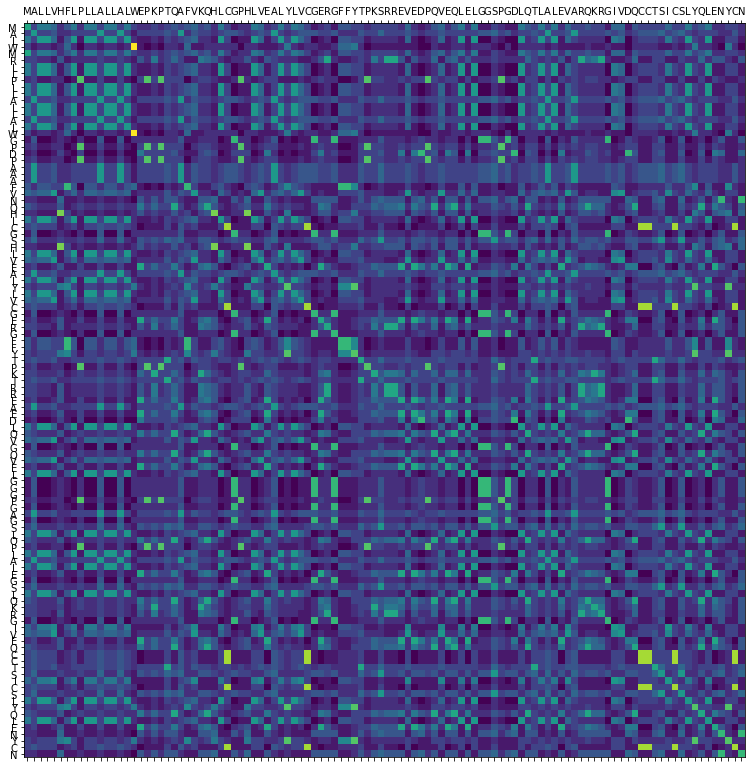



445.0
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
MALLVHFLPLLALLALWEPKPTQAFVKQHLCGPHLVEALYLVCGERGFFYTPKSRREVEDPQVEQLELGGSP--GDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN


In [ ]:
# exercise 8

human_insulin = "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"
mouse_insulin = "MALLVHFLPLLALLALWEPKPTQAFVKQHLCGPHLVEALYLVCGERGFFYTPKSRREVEDPQVEQLELGGSPGDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN"

dotMatrix_B62(human_insulin, mouse_insulin)
print("\n")
score, align_a, align_b = SequenceAlign(human_insulin, mouse_insulin, BLOSUM62)
print(score)
print(align_a) 
print(align_b) 

# even if the sequences don't have many equal AAs, they have many similar AAs, 
# which accounts for high similarity, and with only two gaps, the score is high

Note that similarity generally is not a transitive relation which means that if  A  is similiar with  B  and  B  is similar with  C  does not impy  A  is similiar with  C .

In [ ]:
seq1 = 'FSRPAVVIST'
seq2 = 'FSRGGGVIST'
seq3 = 'AGTGGGVIST'

score12, align1, align2 = SequenceAlign(seq1, seq2, BLOSUM62)
score23, align2, align3 = SequenceAlign(seq2, seq3, BLOSUM62)
score13, align1, align3 = SequenceAlign(seq1, seq3, BLOSUM62)

print(score12)
print(score23)
print(score13)

27.0
32.0
9.0


<h4>  Exercise9*: Write a function TheLongestSubsequence that for two nucleotide sequences returns the longest subsequence that is present in both sequences. For exmaple TheLongestSubsequence("ATGGGGCATTA", "ATGAGGCATTC") should return "GGCATT".

In [54]:
# exercise 9

def lcs(seq_a, seq_b):
    size_a = len(seq_a)
    size_b = len(seq_b)

    commons = []

    # walk through the sequences
    for i in range(size_a):
        for j in range(size_b):
            if i < j:
                # take a piece of the first sequence
                substring = seq_a[i:j]

                # if the substring is not in the second sequence
                if substring in seq_b:
                    # append to the list 
                    commons.append(substring)

    #print(commons) 
    size = -1
    longest = ''
    # find the longest subsequence
    for elem in commons: 
        if len(elem) > size:
            size = len(elem)
            longest = elem

    return longest

In [55]:
seqA = "ATGGGGCATTA"
seq_b = "ATGAGGCATTC"
print(lcs(seqA, seq_b))

['A', 'AT', 'ATG', 'T', 'TG', 'G', 'GG', 'G', 'GG', 'G', 'GG', 'GGC', 'GGCA', 'GGCAT', 'GGCATT', 'G', 'GC', 'GCA', 'GCAT', 'GCATT', 'C', 'CA', 'CAT', 'CATT', 'A', 'AT', 'ATT', 'T', 'TT', 'T']
GGCATT


<h4> Exercise10*: Write a function SuperSequence that takes a list of sequenes and find "the shortest" string that contains all of them. Remark: The solution may not be optimal

In [58]:
# exercise 10

def SuperSequence(list):

    # take the first str of the list
    superseq = list[0]

    # the flag represents whether we replace in the beggining 
    # of the supersequence or in the end    
    end_merge = False
    
    for string in list[1:]:
        len_ss = len(superseq)

        if string not in superseq:

            # number of equal characters between string and supersequence
            merge_length = 0

            # compare the string with the supersequence, starting at the
            # beggining of the supersequence and at the end of the string
            for i in range(min(len(string), len_ss)):
                if superseq[:i] == string[-i:]:
                    # update the merge_length
                    merge_length = i

            # compare the string with the supersequence, starting at the
            # beggining of the string and at the end of the supersequence
            for i in range(min(len(string), len_ss)):
                if superseq[-i:] == string[:i]:

                    # if the length is longer comparing this way, 
                    # this is how we'll merge the sequences
                    if merge_length < i:
                        # update the merge_length
                        merge_length = i

                        # we'll merge the end of the supersequence with the beggining of the string
                        end_merge = True

            # merging sequences
            if end_merge:
                superseq += string[merge_length:]
            else:
                superseq = string + superseq[merge_length:]   

            end_merge = False

    return superseq        

In [59]:
list = ["ATCAGCTGCAT", "AAAAATCA", "TGG"]
SuperSequence(list)

'AAAAATCAGCTGCATGG'